In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10,6)


In [3]:
df = pd.read_csv("prices_of_houses_dataset.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1080,5650,1.0,3,7,1080,1955,98178,47.5102,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,1800,7503


In [4]:
df.shape


(499, 16)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             499 non-null    int64  
 1   date           499 non-null    object 
 2   price          499 non-null    float64
 3   bedrooms       499 non-null    int64  
 4   bathrooms      499 non-null    float64
 5   sqft_living    499 non-null    int64  
 6   sqft_lot       499 non-null    int64  
 7   floors         499 non-null    float64
 8   condition      499 non-null    int64  
 9   grade          499 non-null    int64  
 10  sqft_above     499 non-null    int64  
 11  yr_built       499 non-null    int64  
 12  zipcode        499 non-null    int64  
 13  lat            499 non-null    float64
 14  sqft_living15  499 non-null    int64  
 15  sqft_lot15     499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,499.0,4.493597e+09,2.940073e+09,1.050089e+07,1.871001e+09,3.717000e+09,7.374750e+09,9.828703e+09
price,499.0,5.249405e+05,3.493345e+05,8.000000e+04,3.100000e+05,4.375000e+05,6.400000e+05,3.080000e+06
bedrooms,499.0,3.366733e+00,8.429816e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,499.0,2.081663e+00,7.327120e-01,7.500000e-01,1.750000e+00,2.250000e+00,2.500000e+00,5.000000e+00
sqft_living,499.0,2.097349e+03,9.134574e+02,4.300000e+02,1.430000e+03,1.970000e+03,2.534500e+03,6.070000e+03
sqft_lot,499.0,1.518143e+04,2.911837e+04,1.000000e+03,5.644500e+03,8.336000e+03,1.080000e+04,3.153740e+05
floors,499.0,1.443888e+00,5.048537e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
condition,499.0,3.444890e+00,6.988724e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,499.0,7.627255e+00,1.101905e+00,4.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.000000e+01
sqft_above,499.0,1.759667e+03,7.931365e+02,4.300000e+02,1.090000e+03,1.600000e+03,2.195000e+03,6.070000e+03


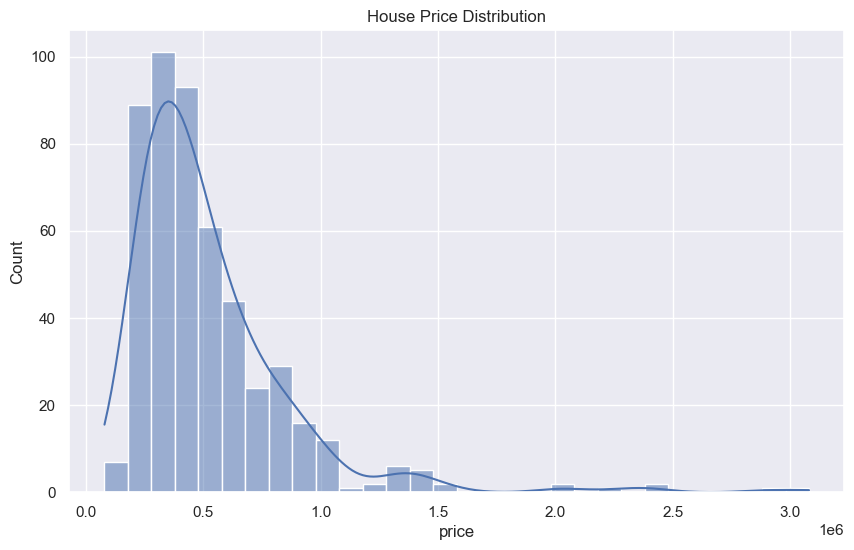

In [7]:
sns.histplot(df['price'], kde=True, bins=30)
plt.title("House Price Distribution")
plt.show()


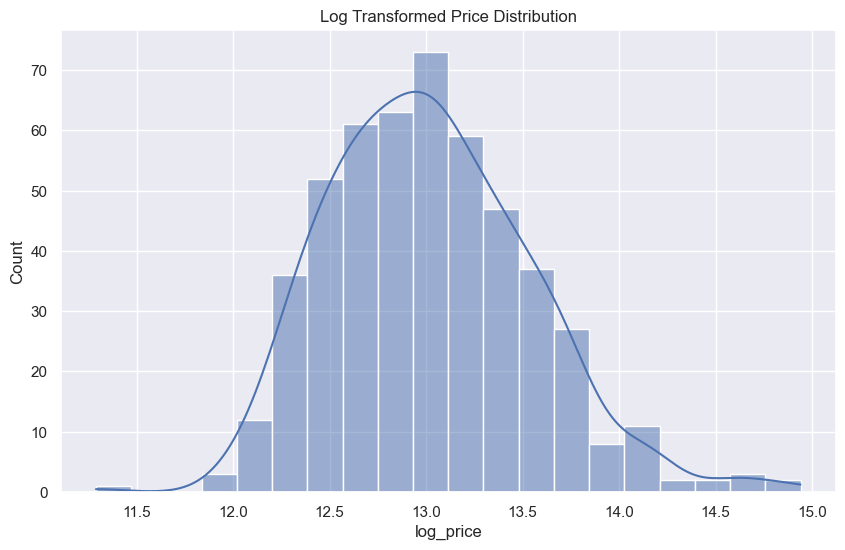

In [8]:
df['log_price'] = np.log(df['price'])

sns.histplot(df['log_price'], kde=True)
plt.title("Log Transformed Price Distribution")
plt.show()


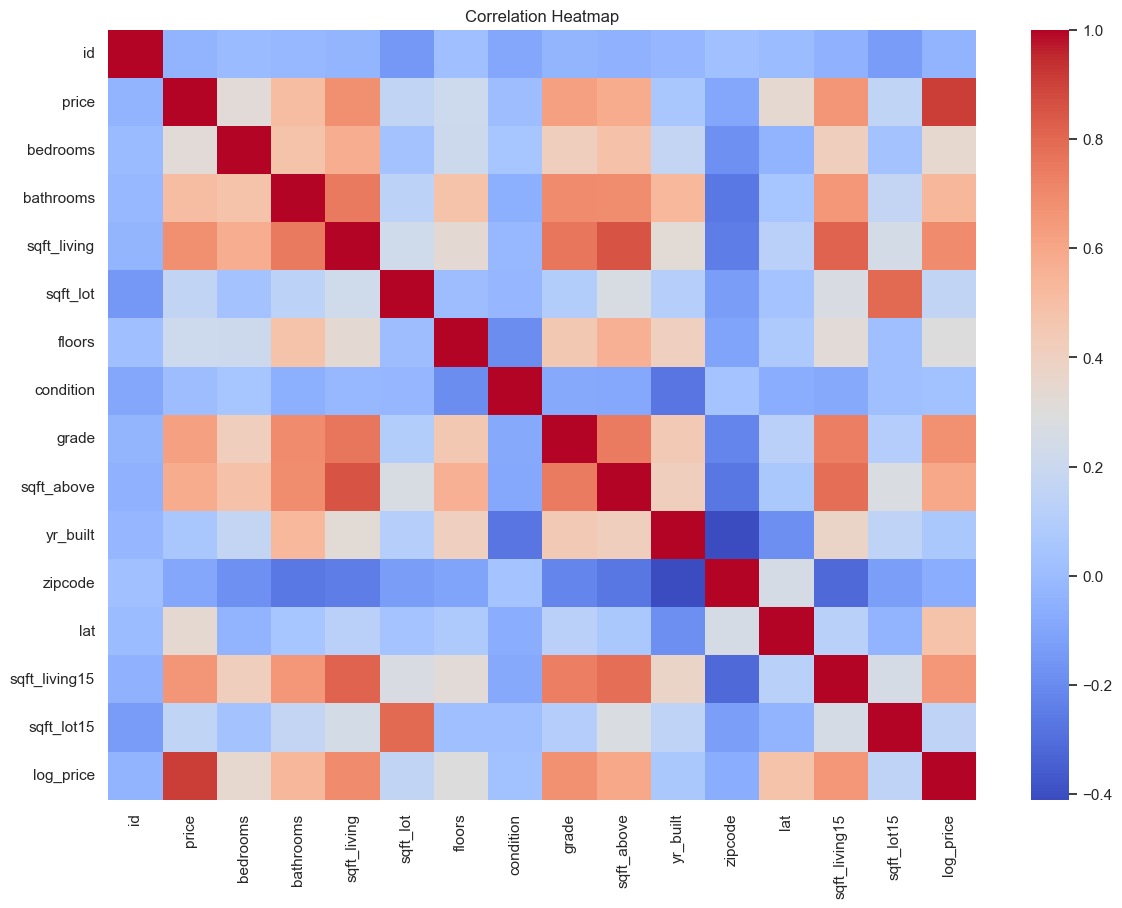

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
corr_price = corr['price'].sort_values(ascending=False)
corr_price


price            1.000000
log_price        0.910977
sqft_living      0.681773
sqft_living15    0.659710
grade            0.620347
sqft_above       0.579781
bathrooms        0.507945
lat              0.339862
bedrooms         0.318038
floors           0.214168
sqft_lot         0.162216
sqft_lot15       0.156952
yr_built         0.058935
condition        0.006626
id              -0.035513
zipcode         -0.095578
Name: price, dtype: float64

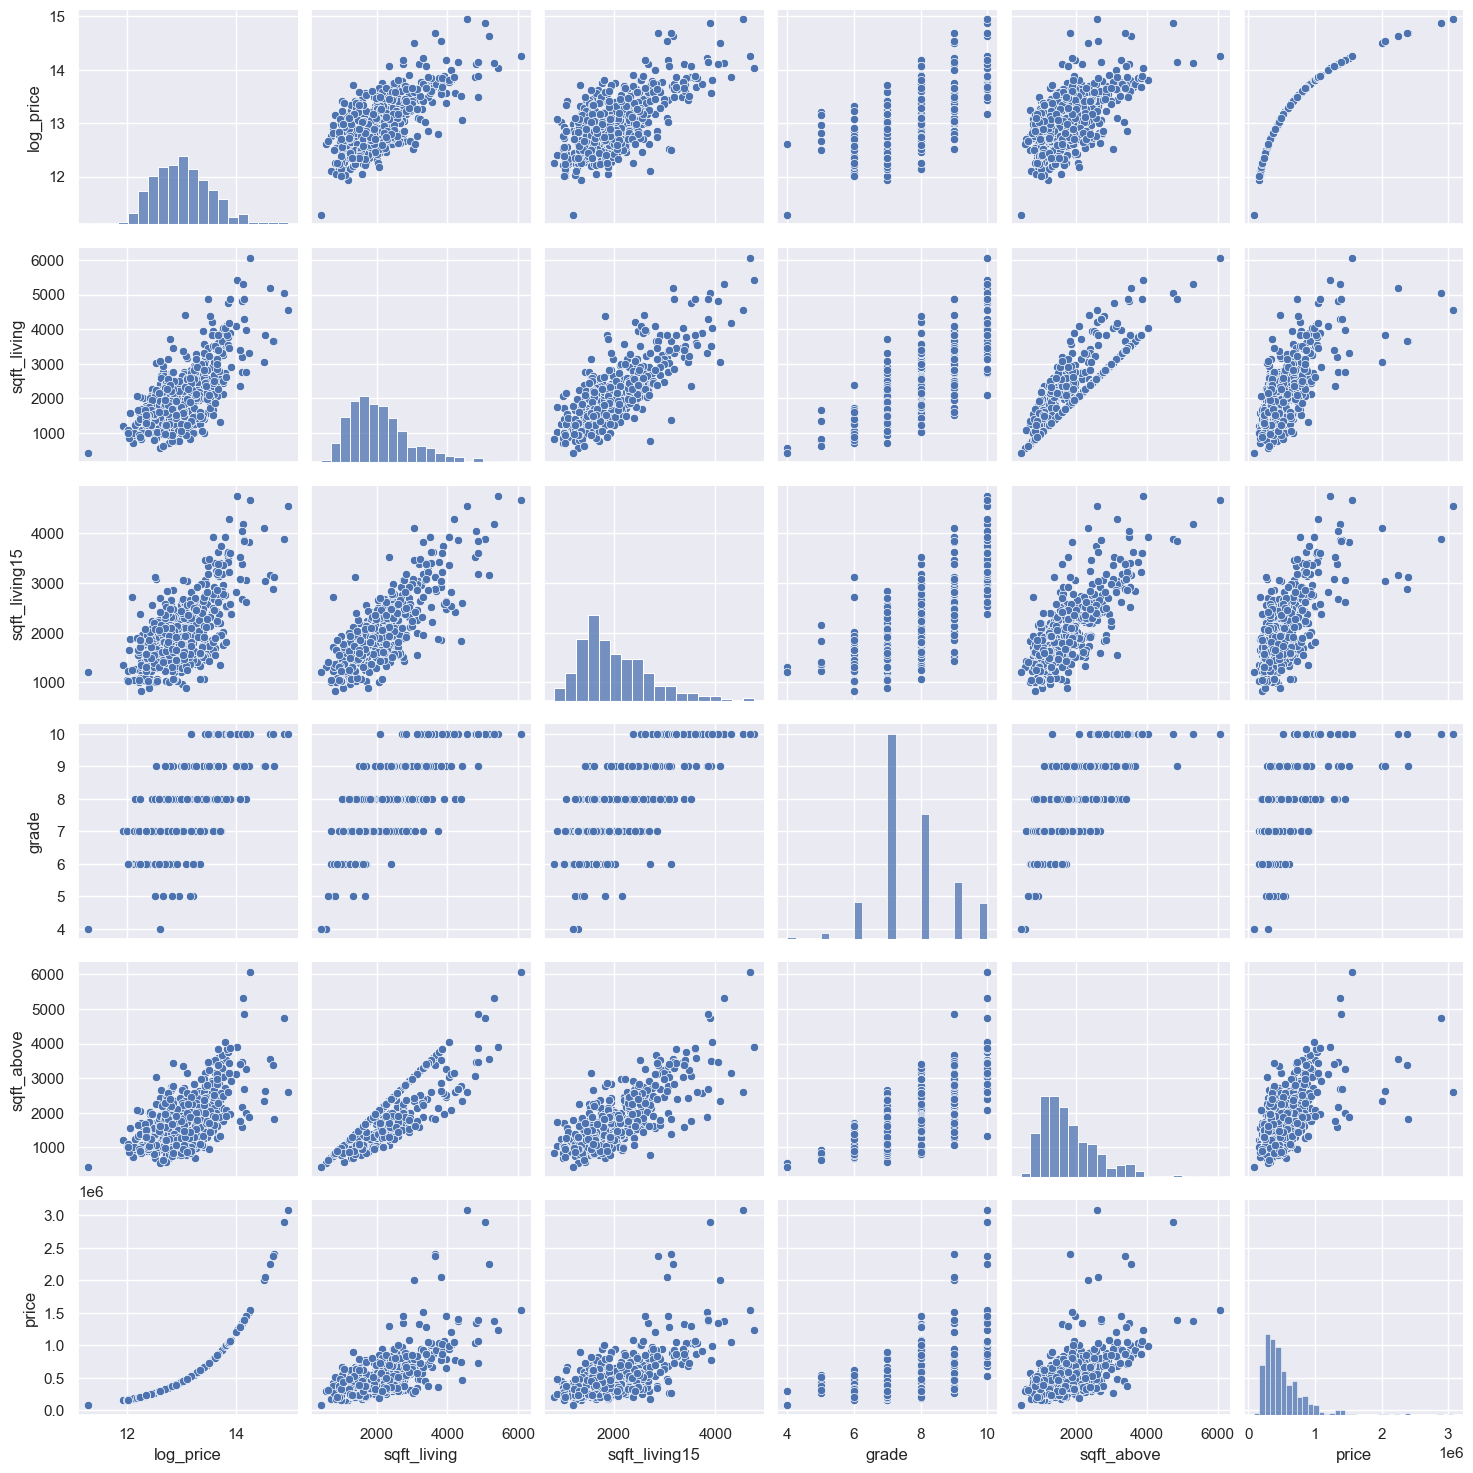

In [11]:
top_features = corr_price.index[1:6]

sns.pairplot(df[top_features.tolist() + ['price']])
plt.show()


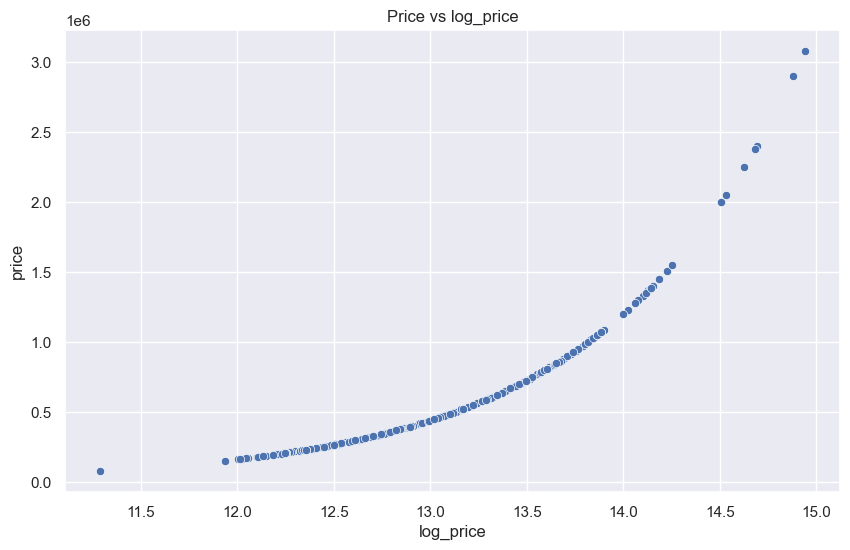

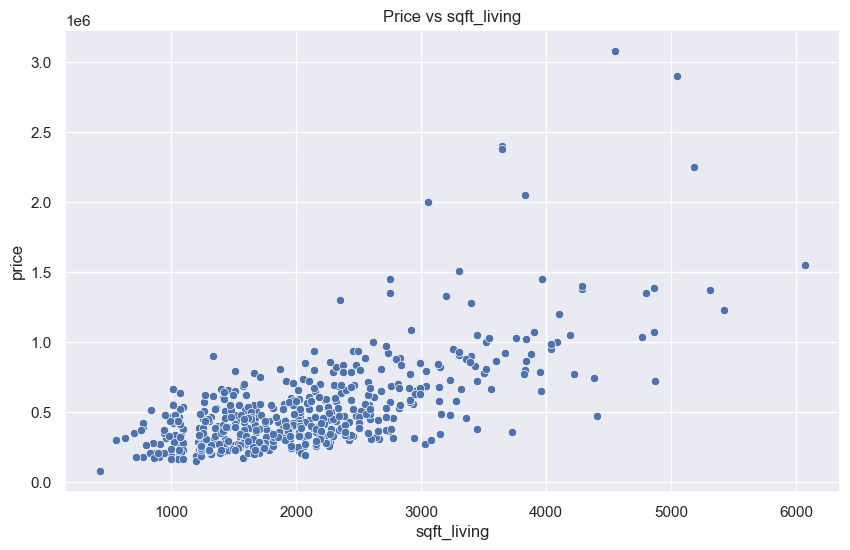

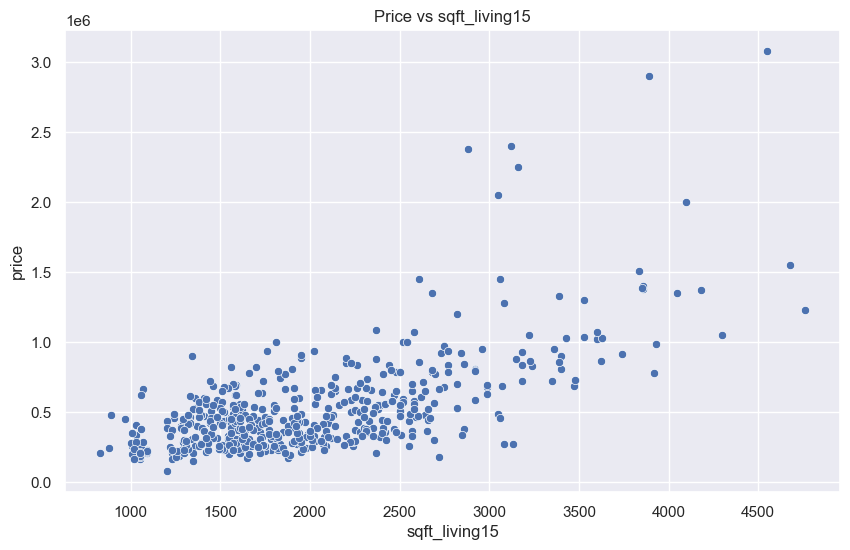

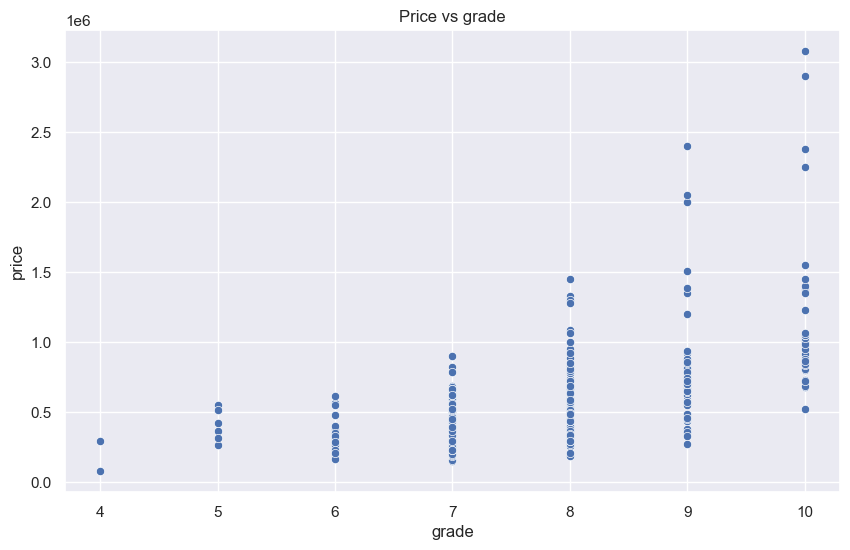

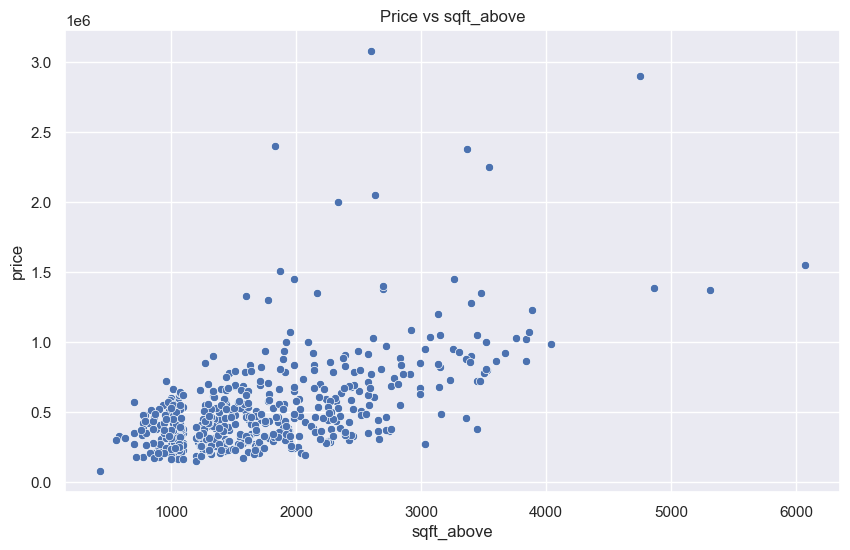

In [12]:
for col in top_features:
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f"Price vs {col}")
    plt.show()


In [13]:
df = df.drop(columns=['id', 'date'], errors='ignore')


In [14]:
X = df.drop(['price', 'log_price'], axis=1)
y = df['price']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [17]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE : 130330.66618043189
RMSE: 196719.1646680589
R2 Score: 0.66063176681681


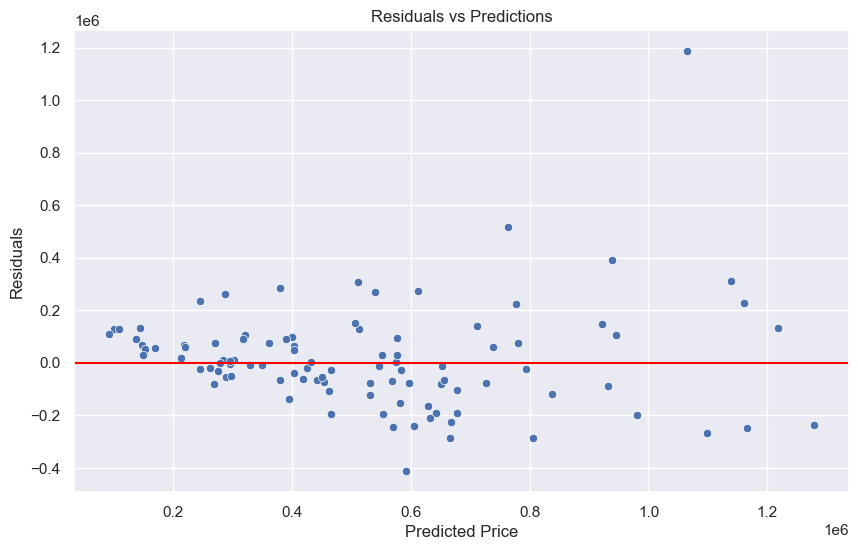

In [18]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


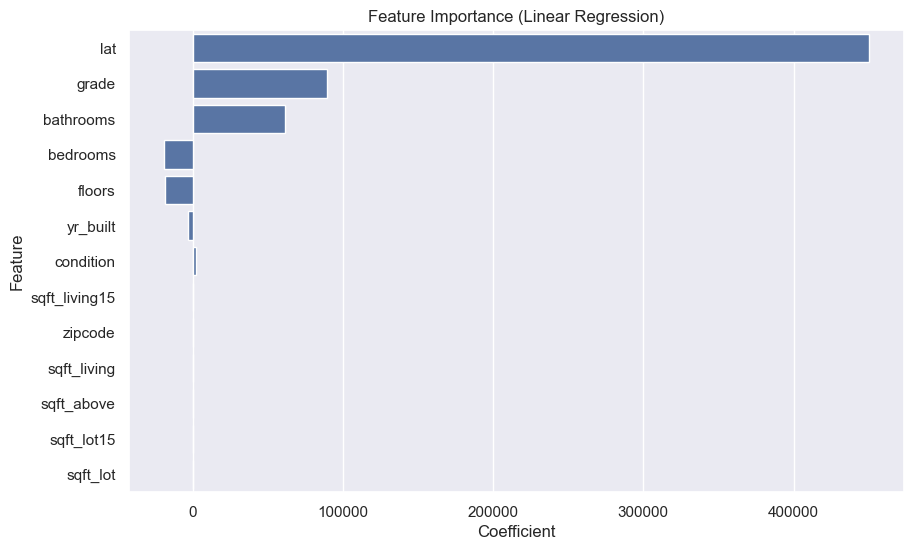

In [19]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

importance = importance.sort_values(
    by='Coefficient', key=abs, ascending=False
)

sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Feature Importance (Linear Regression)")
plt.show()


In [20]:
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))


Ridge R2: 0.6581819465489966
Lasso R2: 0.6606317614438286


In [21]:
sample = X.iloc[0:1]
lr.predict(sample)


array([244768.21852106])